**Henry Landay**

Spring 2024

Supervised Learning and Handwritten Digit Recognition

## Handwritten digit classification: MNIST data

This will train a RBF network on a real image dataset of handwritten number digits:
- 60,000 images in training set, 10,000 images in test set.
- Each image is 28x28 pixels.
- The images are grayscale (no RGB colors).
- Each image (data sample) contains ONE of 10 numeric digit $0, 1, 2, \ldots, 8, 9$.

The goal is to train your network so that it can correctly predict the numeric digit in an image.

More information about MNIST: http://yann.lecun.com/exdb/mnist/

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from rbf_net import RBF_Net
from kmeans import KMeans

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# Loading and Preprocessing Data
rbf_dev_train = pd.read_csv('data/rbf_dev_train.csv').to_numpy()
rbf_dev_test = pd.read_csv('data/rbf_dev_test.csv').to_numpy()

y_train = rbf_dev_train[:, 2].astype(int)
y_test = rbf_dev_test[:, 2].astype(int)

rbf_dev_train = rbf_dev_train[:, :2]
rbf_dev_test = rbf_dev_test[:, :2]

min_train = np.min(rbf_dev_train, axis=0)
max_train = np.max(rbf_dev_train, axis=0)

# Min-Max normalization
rbf_dev_train =  (rbf_dev_train - min_train) / (max_train - min_train)
rbf_dev_test =  (rbf_dev_test - min_train) / (max_train - min_train)

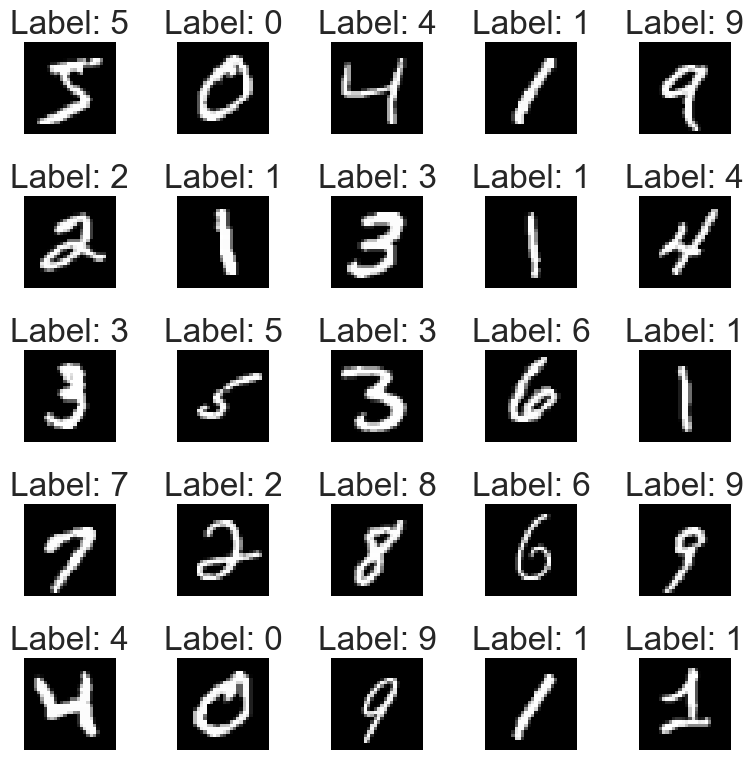

In [19]:
# loading the MNIST dataset
train_x = np.load('data/mnist_train_data.npy')
train_y = np.load('data/mnist_train_labels.npy')

test_x = np.load('data/mnist_test_data.npy')
test_y = np.load('data/mnist_test_labels.npy')

plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_x[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Label: {train_y[i]}')
plt.tight_layout()
plt.show()

In [20]:
# Data Preprocessing

def pre_process(data):
    x, y, z = data.shape
    new = data.reshape(x, y*z)
    max = np.max(new)
    min = np.min(new)
    new = (new - min) / (max - min)
    return new

x_train_new = pre_process(train_x)
x_test_new = pre_process(test_x)

In [21]:
# Training / Assessing RBF network on MNIST Dataset
np.random.seed(0)
mnist_net = RBF_Net(100, 10)
mnist_net.train(x_train_new[:3000, :], train_y[:3000])

pred_train = mnist_net.predict(x_train_new[:3000, :])
pred_test = mnist_net.predict(x_test_new)

acc_train = mnist_net.accuracy(train_y[:3000], pred_train)
acc_test = mnist_net.accuracy(test_y, pred_test)

print("The accuracy on the training set is:", acc_train)
print("The accuracy on the test set is:", acc_test)

The accuracy on the training set is: 0.917
The accuracy on the test set is: 0.9002


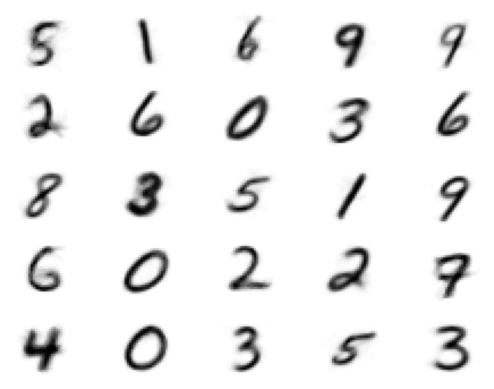

In [22]:
# Visualize network hidden layer prototypes
prototypes = mnist_net.get_prototypes()
prototypes = np.reshape(prototypes, [prototypes.shape[0], 28, 28])

cols = rows = 5
fig, axes = plt.subplots(nrows=rows, ncols=cols)
for i in range(rows):
    for j in range(cols):
        axes[i, j].imshow(prototypes[i*rows + j])
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

[ 7 37 47 44 45]
[ 1 94 74 45 33]
[28 68 45  3 82]
[30 41  8 78 88]
[67 62 95 70 20]
[44 23 45 24 84]
[83 15 28 64  0]
[62 99  0 58 14]
[30 65 84 10 45]
[67  0 69 78 53]


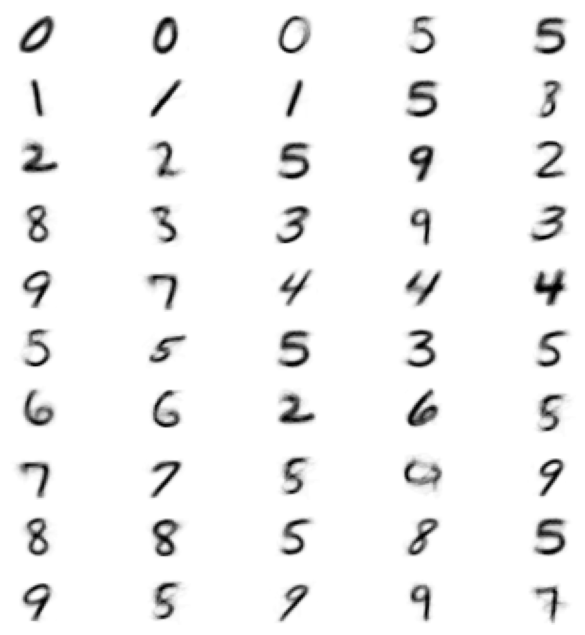

In [23]:
# Visualizing Prototype Weights
fig, axes = plt.subplots(10, 5, figsize=(8, 8))
wts = mnist_net.wts[1:, :]
for i in range(wts.shape[1]):
    top_five_indices = np.flip(np.argsort(np.abs(wts[:, i])))
    top_five_indices = top_five_indices[:5]
    print(top_five_indices)
    top_five = mnist_net.prototypes[top_five_indices]
    for j in range(5):
        axes[i, j].imshow(top_five[j].reshape(28,28))
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])


In [24]:
def show_accuracy(images, labels_true, labels_pred, rows, cols, figsize=(20, 20)):
    # using subplots
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i in range(rows):
        for j in range(cols):
            index = i * cols + j
            axes[i, j].imshow(images[index].reshape(28, 28), cmap='gray') 
            axes[i, j].set_title(f'True: {labels_true[index]}\nPredicted: {labels_pred[index]}', fontsize=20)
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])
            
    plt.tight_layout()
    plt.show()


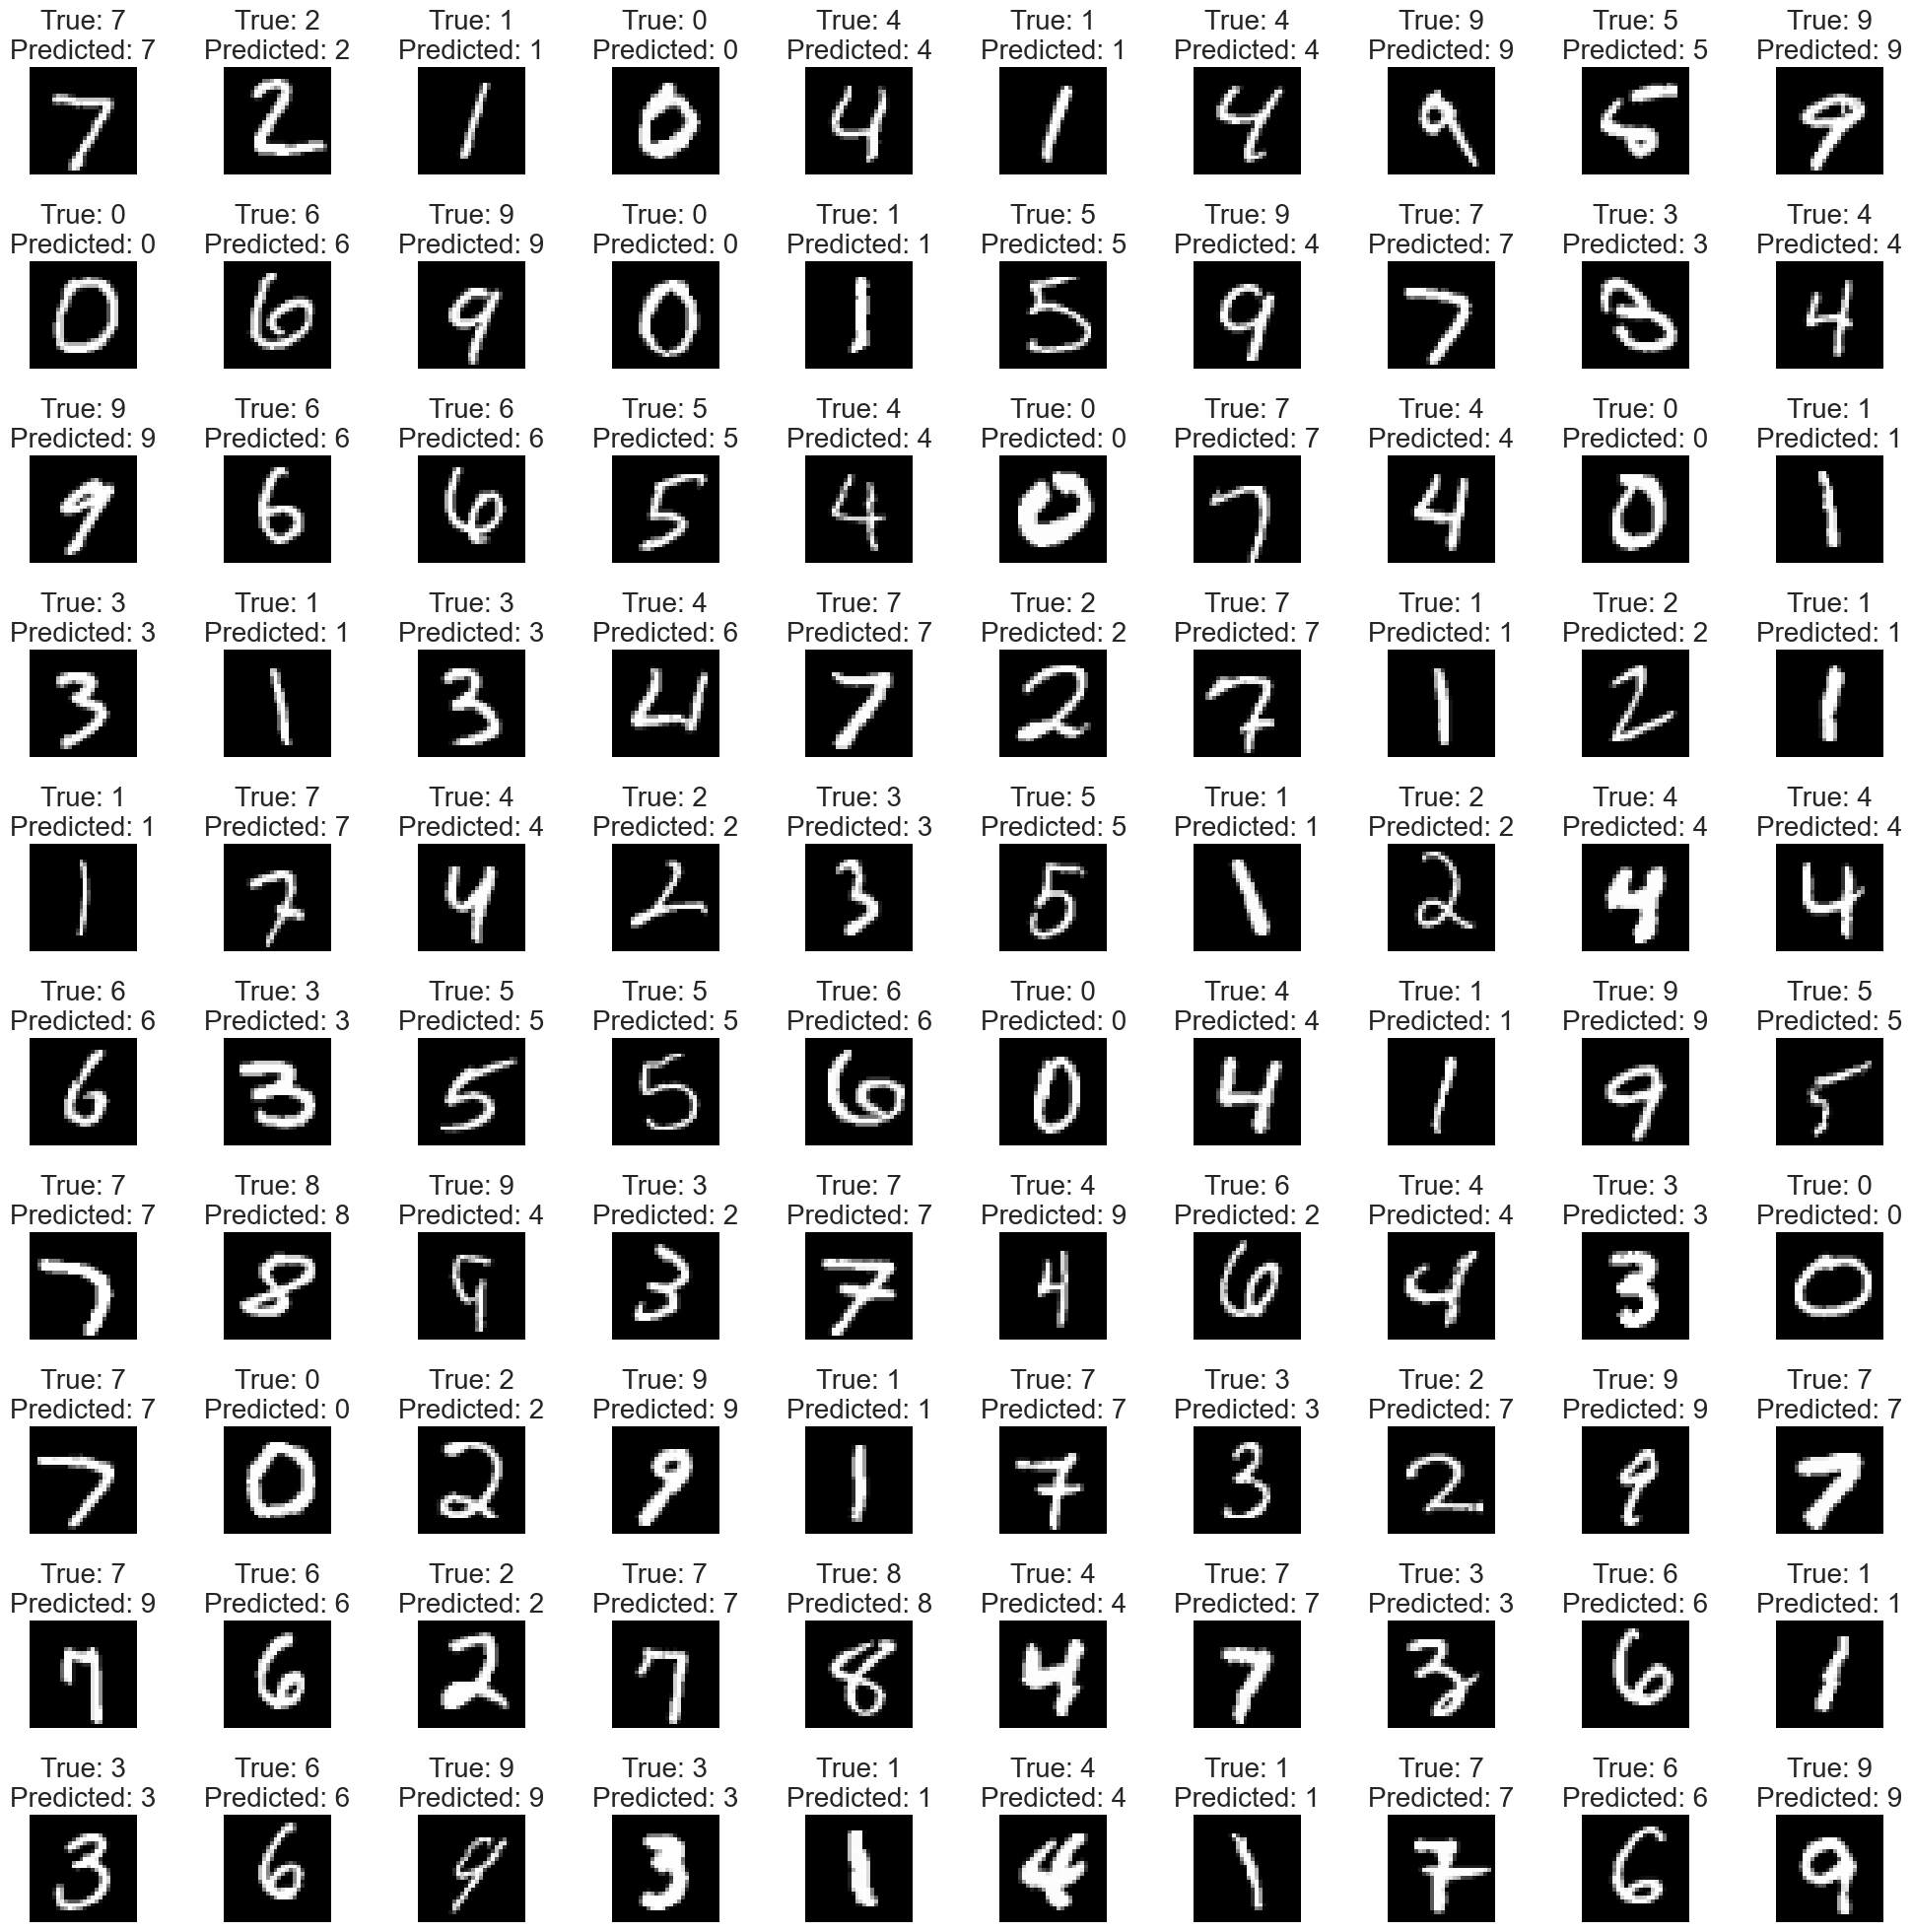

In [25]:
show_accuracy(x_test_new, test_y, pred_test, rows=10, cols=10)